# 결측치 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import time
import pickle
import gc

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Data Load

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_20864/1240487347.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./data/train.csv')


In [3]:
# 데이터 형태 확인
print(f'train data shape: {train_df.shape}')
print(f'test data shape: {test_df.shape}')

train data shape: (1118822, 52)
test data shape: (9272, 51)


In [4]:
# info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   시군구                     9272 non-null   object 
 1   번지                      9270 non-null   object 
 2   본번                      9272 non-null   float64
 3   부번                      9272 non-null   float64
 4   아파트명                    9262 non-null   object 
 5   전용면적(㎡)                 9272 non-null   float64
 6   계약년월                    9272 non-null   int64  
 7   계약일                     9272 non-null   int64  
 8   층                       9272 non-null   int64  
 9   건축년도                    9272 non-null   int64  
 10  도로명                     9272 non-null   object 
 11  해제사유발생일                 212 non-null    float64
 12  등기신청일자                  9272 non-null   object 
 13  거래유형                    9272 non-null   object 
 14  중개사소재지                  9272 non-null   

### 결측치 확인

In [6]:
train_df.isna().sum()

시군구                             0
번지                            225
본번                             75
부번                             75
아파트명                         2126
전용면적(㎡)                         0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1112839
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         870691
k-전화번호                     870274
k-팩스번호                     872742
단지소개기존clob                1050240
k-세대타입(분양형태)               869563
k-관리방식                     869563
k-복도유형                     869890
k-난방방식                     869563
k-전체동수                     870630
k-전체세대수                    869563
k-건설사(시공사)                 871058
k-시행사                      871254
k-사용검사일-사용승인일              869696
k-연면적                      869563
k-주거전용면적      

In [7]:
test_df.isna().sum()

시군구                          0
번지                           2
본번                           0
부번                           0
아파트명                        10
전용면적(㎡)                      0
계약년월                         0
계약일                          0
층                            0
건축년도                         0
도로명                          0
해제사유발생일                   9060
등기신청일자                       0
거래유형                         0
중개사소재지                       0
k-단지분류(아파트,주상복합등등)        6582
k-전화번호                    6576
k-팩스번호                    6606
단지소개기존clob                8718
k-세대타입(분양형태)              6562
k-관리방식                    6562
k-복도유형                    6564
k-난방방식                    6562
k-전체동수                    6577
k-전체세대수                   6562
k-건설사(시공사)                6579
k-시행사                     6580
k-사용검사일-사용승인일             6563
k-연면적                     6562
k-주거전용면적                  6562
k-관리비부과면적                 6562
k-전용면적별세대현황(60㎡이하)        6562
k-전용면적별세

In [8]:
train_df

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


In [11]:
test_df.head()

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0


### train, test 데이터 병합
- 동일한 전처리를 위해 데이터를 병합한다.

In [6]:
train_df['is_test'] = 0
test_df['is_test'] = 1

In [7]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
df

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1


In [9]:
df.rename(columns={'전용면적(㎡)':'전용면적', 
                   'k-전용면적별세대현황(60㎡이하)':'k-전용면적별세대현황(60이하)', 
                   'k-전용면적별세대현황(60㎡~85㎡이하)': 'k-전용면적별세대현황(60~85이하)',
                   'k-135㎡초과': 'k-135초과',
                   'k-85㎡~135㎡이하': 'k-85~135이하',
                   'k-135㎡초과': 'k-135초과'}, inplace=True)

In [10]:
df.to_csv('./data/train_test_data.csv', index=False)

# Data 파악

### Data unique, 결측치 확인

In [10]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test'],
      dtype='object')

In [11]:
print(len(df['시군구'].unique())) # unique한 값
print(df['시군구'].isna().sum()) # 결측치
df['시군구'].value_counts()

339
0


시군구
서울특별시 노원구 상계동    45232
서울특별시 노원구 중계동    26524
서울특별시 양천구 신정동    23768
서울특별시 도봉구 창동     23222
서울특별시 구로구 구로동    22941
                 ...  
서울특별시 중구 필동1가        6
서울특별시 용산구 주성동        5
서울특별시 종로구 연지동        4
서울특별시 중구 입정동         3
서울특별시 마포구 구수동        3
Name: count, Length: 339, dtype: int64

In [36]:
col = '번지'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

6579
227


번지
13         4670
17         4600
10         4577
347        4291
481        4191
           ... 
792-20        1
752-42        1
8-27          1
90-13         1
1553-15       1
Name: count, Length: 6578, dtype: int64

In [37]:
col = '본번'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

1524
75


본번
30.0      7105
17.0      5538
13.0      5284
271.0     5015
1.0       4989
          ... 
4974.0       2
1200.0       2
2015.0       2
1486.0       1
2039.0       1
Name: count, Length: 1523, dtype: int64

In [38]:
col = '부번'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

330
75


부번
0.0       827096
1.0        95543
2.0        28015
3.0        18100
5.0        14026
           ...  
174.0          2
340.0          2
516.0          1
233.0          1
1507.0         1
Name: count, Length: 329, dtype: int64

In [39]:
col = '아파트명'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

6550
2136


아파트명
현대               16779
신동아              12929
한신                9128
두산                8593
주공2               7955
                 ...  
제니스뷰                 1
다온숲                  1
포렛빌                  1
DMC금호리첸시아            1
힐스테이트세운센트럴1단지        1
Name: count, Length: 6549, dtype: int64

In [40]:
col = '전용면적'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

14670
0


전용면적
84.9600     20593
84.9700     20093
84.9900     19491
84.9800     19238
59.9400     13974
            ...  
26.7200         1
59.9951         1
104.9880        1
123.0600        1
59.7446         1
Name: count, Length: 14670, dtype: int64

In [41]:
col = '계약년월'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

201
0


계약년월
202006    16364
201503    15510
201808    14990
201707    14922
201705    14766
          ...  
202207      690
202211      646
202209      620
202210      576
201609      460
Name: count, Length: 201, dtype: int64

In [42]:
col = '계약일'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

31
0


계약일
20    40236
15    39519
10    39404
13    38387
18    38217
11    38144
16    38083
25    37615
23    37579
22    37447
9     37444
27    37357
14    37325
12    37082
17    36841
7     36726
8     36655
28    36320
21    36310
19    36251
6     36052
1     36038
4     36029
24    35872
5     35799
26    35510
30    35022
3     34785
2     34758
29    34261
31    21026
Name: count, dtype: int64

In [43]:
col = '층'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

73
0


층
 5     82748
 4     82633
 3     81089
 2     77575
 6     74215
       ...  
 68        6
 65        6
 67        6
-4         4
 69        2
Name: count, Length: 73, dtype: int64

In [44]:
col = '건축년도'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

60
0


건축년도
2004    68919
2003    66039
1999    60262
2000    57250
1988    55953
2005    48648
1998    44325
2001    42574
1997    42531
2002    42174
2008    37540
2006    35168
1992    32792
1996    32341
1993    30694
2007    29929
1995    27218
1994    25902
1987    25781
2009    24260
1989    23829
1986    23494
2010    21178
2011    20480
2014    17433
2012    16555
1990    15800
1991    15336
1983    14293
2013    13559
1982    11800
1984    10671
1980     9820
2015     8965
2016     8558
1978     8128
1985     8097
1979     7069
1981     5225
2019     5195
2018     5106
2017     4869
1974     3444
2020     3084
1976     2665
1971     2407
1977     2329
1975     2187
2021     1951
1973     1049
2022      761
1970      689
1972      685
1969      537
1968      253
1966      105
2023       99
1961       55
1967       17
1965       17
Name: count, dtype: int64

In [45]:
col = '도로명'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

9245
0


도로명
올림픽로 435      4372
솔샘로 174       4049
송파대로 345      3668
성북로4길 52      3519
양재대로 1340     3369
              ... 
한강대로62길 18       1
광나루로39길 11       1
 20-3            1
곰달래로 60-1        1
을지로15길 31        1
Name: count, Length: 9245, dtype: int64

In [47]:
col = '해제사유발생일'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

1034
1121899


해제사유발생일
20220211.0    151
20200727.0     43
20200714.0     40
20200720.0     37
20200715.0     32
             ... 
20230722.0      1
20221119.0      1
20220802.0      1
20220722.0      1
20230909.0      1
Name: count, Length: 1033, dtype: int64

In [103]:
col = '등기신청일자'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

182
1111271


등기신청일자
20230630    585
20230831    496
20230428    394
20230731    374
20230530    367
           ... 
20230105      3
20230125      3
20230109      1
20230102      1
20230104      1
Name: count, Length: 181, dtype: int64

In [49]:
col = '거래유형'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

3
0


거래유형
-       1086451
중개거래      38123
직거래        3520
Name: count, dtype: int64

In [50]:
col = '중개사소재지'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

739
0


중개사소재지
-                    1090013
서울 노원구                  2627
서울 송파구                  2540
서울 강남구                  2508
서울 강동구                  2038
                      ...   
서울 강북구, 서울 양천구             1
경기 남양주시, 경기 성남수정구          1
서울 송파구, 인천 계양구             1
경기 연천군, 서울 송파구             1
서울 중랑구, 인천 부평구             1
Name: count, Length: 739, dtype: int64

In [52]:
col = 'k-단지분류(아파트,주상복합등등)'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

6
877273


k-단지분류(아파트,주상복합등등)
아파트               238586
주상복합               11450
도시형 생활주택(주상복합)       505
도시형 생활주택(아파트)        155
연립주택                 125
Name: count, dtype: int64

In [53]:
col = 'k-전화번호'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

1083
876850


k-전화번호
024162883      3068
02-575-5024    2816
024046006      2605
025677608      2515
023743863      2385
               ... 
226662806.0       1
29748290.0        1
25147022.0        1
024524500         1
0222099040        1
Name: count, Length: 1082, dtype: int64

In [54]:
col = 'k-팩스번호'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

1386
879348


k-팩스번호
02-572-3212    2816
24162280.0     2470
025613140      2425
29797224.0     2378
25334075.0     2321
               ... 
220689972.0       1
0222099041        1
028130449         1
024524533         1
025861159         1
Name: count, Length: 1385, dtype: int64

In [55]:
col = '단지소개기존clob'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

95
1058958


단지소개기존clob
4.0       24034
1474.0     2480
638.0      2366
301.0      2119
2315.0     1572
          ...  
2039.0      120
63.0        114
217.0       111
24.0        110
1417.0       52
Name: count, Length: 94, dtype: int64

In [56]:
col = 'k-세대타입(분양형태)'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

4
876125


k-세대타입(분양형태)
분양    208098
기타     41638
임대      2233
Name: count, dtype: int64

In [58]:
col = 'k-관리방식'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

4
876125


k-관리방식
위탁관리    230361
자치관리     18144
직영        3464
Name: count, dtype: int64

In [59]:
col = 'k-복도유형'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

6
876454


k-복도유형
계단식    124964
혼합식     85513
복도식     38710
타워형      1371
기타       1082
Name: count, dtype: int64

In [60]:
col = 'k-난방방식'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

5
876125


k-난방방식
개별난방    152365
지역난방     84826
중앙난방     12687
기타        2091
Name: count, dtype: int64

In [61]:
col = 'k-전체동수'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

42
877207


k-전체동수
10.0     20021
2.0      17300
6.0      16357
3.0      15418
4.0      13336
1.0      12437
7.0      11874
5.0      11864
9.0      10930
8.0      10775
14.0      9892
15.0      9019
11.0      8126
12.0      7802
28.0      7649
13.0      7089
19.0      6635
16.0      4709
22.0      4249
31.0      4009
32.0      3878
23.0      3248
72.0      3068
124.0     2816
30.0      2623
56.0      2605
20.0      2486
33.0      2385
44.0      2366
34.0      2208
17.0      1708
24.0      1705
18.0      1617
51.0      1513
40.0      1504
21.0      1382
50.0      1370
37.0      1028
26.0       823
84.0       549
41.0       514
Name: count, dtype: int64

In [62]:
col = 'k-전체세대수'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

523
876125


k-전체세대수
5678.0    3068
5040.0    2816
4494.0    2605
4424.0    2592
2433.0    2480
          ... 
494.0        2
514.0        2
614.0        2
243.0        1
1395.0       1
Name: count, Length: 522, dtype: int64

In [63]:
col = 'k-건설사(시공사)'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

345
877637


k-건설사(시공사)
삼성물산         14259
대우건설         11549
현대건설         10575
대한주택공사        7665
GS건설          7015
             ...  
두산               5
신영건설             3
자이에스앤디(주)        2
혜림건설             1
삼익건설(주)          1
Name: count, Length: 344, dtype: int64

In [64]:
col = 'k-시행사'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

557
877834


k-시행사
SH공사              12604
대한주택공사             7784
도시개발공사             4284
sh공사               4194
재건축조합              4065
                  ...  
(주)에스떠블유산업개발          2
청명종합건설(주)             2
사당3주택재건축정비사업조합        2
개포우성9차모델링조합           2
한호건설(주)               2
Name: count, Length: 556, dtype: int64

In [66]:
col = 'k-사용검사일-사용승인일'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

675
876259


k-사용검사일-사용승인일
1992-11-18 00:00:00.0    3297
2008-09-30 00:00:00.0    3068
1990-09-06 00:00:00.0    2861
1982-06-04 00:00:00.0    2816
2005-12-28 00:00:00.0    2644
                         ... 
2022-07-28 00:00:00.0       2
2021-12-01 00:00:00.0       2
2023-01-16 00:00:00.0       2
2023-01-27 00:00:00.0       1
1994-12-07 00:00:00.0       1
Name: count, Length: 674, dtype: int64

In [67]:
col = 'k-연면적'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

736
876125


k-연면적
935380.0    3068
240629.0    2816
667132.0    2605
504698.0    2592
172371.0    2480
            ... 
80835.0        2
44951.0        2
51129.0        2
33807.0        1
60621.0        1
Name: count, Length: 735, dtype: int64

In [68]:
col = 'k-주거전용면적'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

741
876170


k-주거전용면적
470140.0    3068
242461.0    2816
537573.0    2605
353089.0    2592
117086.0    2480
            ... 
38716.0        2
24878.0        2
18236.0        2
22782.0        1
37677.0        1
Name: count, Length: 740, dtype: int64

In [69]:
col = 'k-관리비부과면적'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

737
876125


k-관리비부과면적
618666.0    3068
240629.0    2816
646257.0    2605
470732.0    2592
166985.0    2480
            ... 
50194.0        2
31174.0        2
18237.0        2
22782.0        1
57799.0        1
Name: count, Length: 736, dtype: int64

In [71]:
col = 'k-전용면적별세대현황(60이하)'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

350
876170


k-전용면적별세대현황(60이하)
0.0       54234
1150.0     3068
370.0      2893
4975.0     2816
750.0      2744
          ...  
543.0         5
438.0         2
614.0         2
9.0           1
1395.0        1
Name: count, Length: 349, dtype: int64

In [72]:
col = 'k-전용면적별세대현황(60~85이하)'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

388
876170


k-전용면적별세대현황(60~85이하)
0.0       43342
688.0      3306
4042.0     3068
65.0       2971
1500.0     2605
          ...  
465.0         7
25.0          7
850.0         6
273.0         5
333.0         2
Name: count, Length: 387, dtype: int64

In [74]:
col = 'k-85~135이하'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

245
876170


k-85~135이하
0.0      100377
90.0       3254
486.0      3068
900.0      2605
456.0      2573
          ...  
9.0          38
487.0        22
220.0        15
2.0          12
494.0         2
Name: count, Length: 244, dtype: int64

In [75]:
col = 'k-135초과'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

2
1127765


k-135초과
70.0    329
Name: count, dtype: int64

In [76]:
col = 'k-홈페이지'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

222
1013523


k-홈페이지
없음                                                        3628
www.jsls.co.kr                                            3068
gaepo001@naver.com                                        2816
www.oftapt.com                                            2605
성산시영.apt.co.kr                                            2385
                                                          ... 
bbgran.xisad.co.kr                                           7
www. 자양12구역지역재개발조합                                           7
cafe.naver.com                                               6
thesharp-trieh.hthomeservice.com/#/feeManage?_k=vm58ep       2
http://www.i-sh.co.kr/happy/intro.do                         1
Name: count, Length: 221, dtype: int64

In [77]:
col = 'k-등록일자'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

128
1116386


k-등록일자
2017-02-01 10:49:21.0    1875
2017-02-10 12:21:22.0     736
2019-01-03 07:03:23.0     549
2017-04-18 02:58:24.0     317
2017-09-06 06:35:46.0     245
                         ... 
2021-11-10 10:27:07.0       2
2021-10-09 20:49:45.0       2
2022-01-05 18:02:23.0       2
2023-03-06 22:40:25.0       2
2023-02-18 07:24:46.0       1
Name: count, Length: 127, dtype: int64

In [78]:
col = 'k-수정일자'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

745
876170


k-수정일자
2023-09-20 21:38:55.0    3068
2020-02-17 06:10:24.0    2816
2023-09-20 22:10:18.0    2605
2023-09-23 17:49:17.0    2592
2023-09-25 09:18:00.0    2480
                         ... 
2023-09-25 18:02:22.0       2
2023-09-23 17:23:08.0       2
2023-09-26 04:36:00.0       2
2023-09-23 08:21:37.0       1
2023-09-25 07:49:22.0       1
Name: count, Length: 744, dtype: int64

In [79]:
col = '고용보험관리번호'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

527
920757


고용보험관리번호
909-01-23103-1    3068
21380014370       2816
908-00-99517-1    2592
907-009-67911     2480
907-00-16928-1    2385
                  ... 
92023031541         28
91919837281         20
918-15-59912-1      15
206-82-61203-0       3
21780016330          1
Name: count, Length: 526, dtype: int64

In [80]:
col = '경비비관리형태'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

5
877561


경비비관리형태
위탁       208757
직영        33791
위탁+직영      6168
기타         1817
Name: count, dtype: int64

In [81]:
col = '세대전기계약방법'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

3
885389


세대전기계약방법
종합계약    124610
단일계약    118095
Name: count, dtype: int64

In [84]:
col = '청소비관리형태'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

5
877751


청소비관리형태
위탁       227511
직영        15174
위탁+직영      4179
기타         3479
Name: count, dtype: int64

In [85]:
col = '건축면적'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

456
876279


건축면적
0.00         118394
49266.41       2605
172371.00      2480
25737.00       2366
20457.82       2208
              ...  
6135.89           2
6171.68           2
2724.46           2
6329.59           2
2909.14           1
Name: count, Length: 455, dtype: int64

In [86]:
col = '주차대수'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

527
876277


주차대수
0.0       18141
2.0        3415
1.0        2864
4245.0     2605
3021.0     2592
          ...  
657.0         2
984.0         2
915.0         2
305.0         2
363.0         1
Name: count, Length: 526, dtype: int64

In [87]:
col = '기타/의무/임대/임의=1/2/3/4'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

5
876125


기타/의무/임대/임의=1/2/3/4
의무    241849
기타      4186
임의      3701
임대      2233
Name: count, dtype: int64

In [88]:
col = '단지승인일'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

737
876854


단지승인일
2013-06-23 12:47:34.0    3068
2013-06-23 14:21:02.0    2816
2015-01-12 11:06:54.0    2605
2017-04-12 17:26:04.0    2592
2019-01-03 16:13:52.0    2480
                         ... 
2021-12-01 11:18:38.0       2
2022-02-23 13:01:10.0       2
2023-07-21 14:14:45.0       2
2023-04-27 13:23:51.0       1
2016-05-27 17:03:25.0       1
Name: count, Length: 736, dtype: int64

In [90]:
col = '사용허가여부'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

2
876125


사용허가여부
Y    251969
Name: count, dtype: int64

In [92]:
col = '관리비 업로드'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

3
876125


관리비 업로드
N    247788
Y      4181
Name: count, dtype: int64

In [94]:
col = '좌표X'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

743
876232


좌표X
127.088451    3068
127.058521    2816
127.114376    2605
127.065070    2592
127.066569    2480
              ... 
126.904871       2
127.144876       2
126.996600       2
127.095752       1
127.070158       1
Name: count, Length: 742, dtype: int64

In [95]:
col = '좌표Y'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

743
876232


좌표Y
37.512752    3068
37.480002    2816
37.488521    2605
37.497741    2592
37.642724    2480
             ... 
37.488308       2
37.483848       2
37.564541       2
37.585561       1
37.630117       1
Name: count, Length: 742, dtype: int64

In [96]:
col = '단지신청일'

print(len(df[col].unique())) # unique한 값
print(df[col].isna().sum()) # 결측치
df[col].value_counts()

261
876187


단지신청일
2013-03-07 09:46:18.0    16583
2013-03-07 09:46:36.0    11887
2013-03-07 09:46:19.0    11670
2013-03-07 09:46:42.0     7973
2013-03-07 09:46:20.0     7624
                         ...  
2022-12-12 11:52:27.0        2
2021-12-01 11:09:41.0        2
2022-02-23 11:05:05.0        2
2023-07-21 14:11:01.0        2
2023-04-27 13:20:30.0        1
Name: count, Length: 260, dtype: int64

In [98]:
col = 'target'
tmp = df[df['is_test']==0]

print(len(tmp[col].unique())) # unique한 값
print(tmp[col].isna().sum()) # 결측치
tmp[col].value_counts()

14530
0


target
60000.0     11685
40000.0     10611
30000.0     10046
35000.0      9595
50000.0      9393
            ...  
22175.0         1
131639.0        1
90579.0         1
97414.0         1
20670.0         1
Name: count, Length: 14530, dtype: int64

In [12]:
# 등기신청일자, 거래유형, 중개사소재지 결측치 처리
df['등기신청일자'].replace(' ', np.nan, inplace=True)
df['거래유형'].replace('-', np.nan, inplace=True)
df['중개사소재지'].replace('-', np.nan, inplace=True)

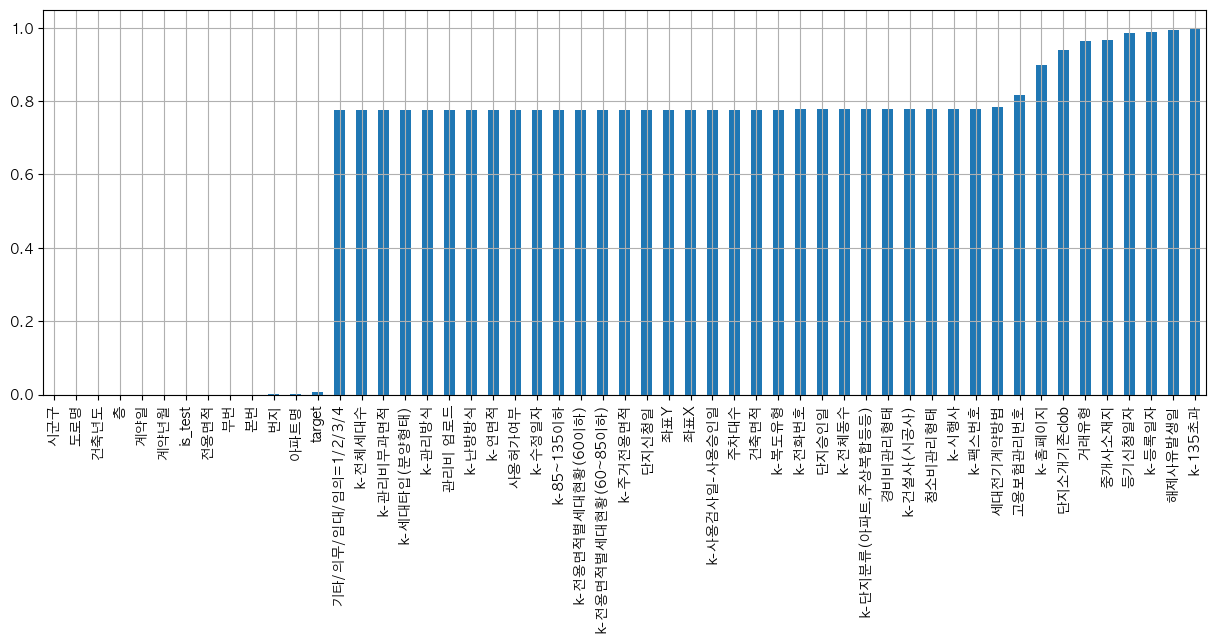

In [13]:
plt.figure(figsize=(15, 5))
missing = df.isna().sum()/df.shape[0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.grid(True)
plt.show()

### 결측치 처리

In [14]:
df.isna().sum()

시군구                           0
번지                          227
본번                           75
부번                           75
아파트명                       2136
전용면적                          0
계약년월                          0
계약일                           0
층                             0
건축년도                          0
도로명                           0
해제사유발생일                 1121899
등기신청일자                  1111271
거래유형                    1086451
중개사소재지                  1090013
k-단지분류(아파트,주상복합등등)       877273
k-전화번호                   876850
k-팩스번호                   879348
단지소개기존clob              1058958
k-세대타입(분양형태)             876125
k-관리방식                   876125
k-복도유형                   876454
k-난방방식                   876125
k-전체동수                   877207
k-전체세대수                  876125
k-건설사(시공사)               877637
k-시행사                    877834
k-사용검사일-사용승인일            876259
k-연면적                    876125
k-주거전용면적                 876170
k-관리비부과면적                876125
k-전용면적별세

In [15]:
# 결측치가 너무 많은 경우 해당 변수 제거

need_drop_cols = df.columns[df.isna().sum() >= 1000000]
df.drop(need_drop_cols, axis=1, inplace=True)

In [16]:
len(df.columns)

45

In [17]:
need_crawling = df[df['좌표X'].isna()]['아파트명'].unique().tolist()
need_crawling

['개포주공4단지',
 '개포주공7단지',
 '개포현대200동',
 '경남1',
 '경남2차',
 '뉴현대파크빌',
 '리치타운',
 '삼익대청',
 '새롬',
 '성원대치2단지',
 '시영',
 '아람손프라자/비바빌',
 '에버그린',
 '우성8',
 '우성9차',
 '우찬현대',
 '현대',
 '현대1차101동~106동',
 '현대2',
 'e-편한세상',
 '거평프리젠',
 '경남논현',
 '골든캐슬',
 '논현동월드메르디앙',
 '논현동프라임',
 '논현동한화꿈에그린',
 '논현라폴리움',
 '논현베르빌',
 '논현빌라트',
 '논현아트빌',
 '논현웰스톤',
 '논현파라곤',
 '논현프라임',
 '논현한가람빌라트',
 '동부센트레빌',
 '동현',
 '두산위브1단지',
 '두산위브2단지',
 '두영',
 '벨러스빌',
 '브라운스톤',
 '스위트캐슬레지던스',
 '신동아',
 '쌍용',
 '우민',
 '우성',
 '월드쉐르빌',
 '이산',
 '이움빌라',
 '지고하임',
 '청학',
 '케럿스테이트',
 '케이씨빌',
 '토미빌',
 '프라임',
 '학동',
 '한양빌라트',
 '한양수자인어반게이트',
 '한진로즈힐',
 '한화꿈에그린2차',
 '현대넥서스A동',
 '현대인텔렉스',
 '개포우성1',
 '개포우성2',
 '대우아이빌멤버스',
 '대우아이빌명문가',
 '대치SKVIEW',
 '대치동우정에쉐르1',
 '대치동우정에쉐르2',
 '대치우성',
 '대치하나빌',
 '대치한신휴플러스',
 '동민맥스빌A동',
 '동민맥스빌B동',
 '동양',
 '래미안대치팰리스',
 '롯데캐슬',
 '메트로',
 '삼성2차',
 '삼성3차',
 '선경1차',
 '선경2차',
 '선경3차',
 '선릉역대우아이빌',
 '선릉역풍림아이원레몬',
 '세연파크뷰',
 '세영팔레스타운',
 '신성미소시티',
 '쌍용대치2',
 '쌍용대치',
 '아름빌',
 '우정에쉐르',
 '청암빌라트',
 '포스코더샵',
 '풍림아이원1차103동',
 '풍림아이원2차202동',
 '풍림

In [18]:
# 크롤링을 통해 처리
# 정확도가 너무 낮다.

url = 'https://www.findlatlng.org/'
driver = webdriver.Chrome()
driver.get(url)

time.sleep(20)

contents = list()

for name in need_crawling:
    driver.find_element(By.CLASS_NAME, 'form-control').click()
    driver.find_element(By.CLASS_NAME, 'form-control').send_keys(name)
    driver.find_element(By.CLASS_NAME, 'btn').click()
    time.sleep(1)

    elements = driver.find_elements(By.CLASS_NAME, 'container-fluid')
    tmp = elements[1].text.split('\n')[1].split('/')
    contents.append((tmp[0][15:], tmp[1][17:]))
    driver.find_element(By.CLASS_NAME, 'form-control').clear()

In [19]:
cnt = 0

for content in contents:
    if len(content[0]) == 0:
        cnt +=1

In [21]:
for content in contents:
    if len(content[0]) != 0:
        print(content)

('37.483822 ', '127.069113')
('37.4888759 ', '127.0716679')
('37.4802905 ', '127.0626272')
('35.36956300000001 ', '128.2570135')
('37.5010283 ', '126.889064')
('48.493955 ', '-123.712449')
('35.36956300000001 ', '128.2570135')
('35.9569243 ', '126.9740136')
('37.5136787 ', '127.0317124')
('37.5136787 ', '127.0317124')
('37.5136787 ', '127.0317124')
('37.512709 ', '127.0326879')
('37.5136787 ', '127.0317124')
('37.5184174 ', '127.0380027')
('37.5165785 ', '127.0403418')
('37.506543 ', '127.0283552')
('37.1325550781157 ', '128.220215134891')
('37.390795 ', '126.980461')
('37.8058049 ', '126.9917654')
('37.1514419074162 ', '127.053965318309')
('49.726582 ', '-105.145312')
('35.1316162 ', '129.0974464')
('37.755136576734 ', '128.93177368976')
('37.5169307 ', '127.031188')
('37.5096909 ', '127.0334919')
('37.5117092 ', '127.036271')
('37.5010801 ', '127.0653216')
('37.5046324 ', '127.053752')
('37.5050809 ', '127.0535226')
('37.4957793 ', '127.060541')
('37.5045644 ', '127.0541516')
('37.50

# 결측치 처리

In [2]:
df = pd.read_csv('./data/train_test_data.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_46323/3674877827.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/train_test_data.csv')


In [3]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1


In [4]:
df.shape

(1128094, 53)

In [63]:
# 일부 feature 제거 - 기준은 내마음대로

df.drop(['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호',
         'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수',
         'k-사용검사일-사용승인일', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)', 'k-전용면적별세대현황(60~85이하)',
         'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
         '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일'], axis=1, inplace=True)

In [64]:
df.shape

(1128094, 24)

In [65]:
nan_cols = df.columns[df.isna().sum() >= 1000000]
df.drop(nan_cols, axis=1, inplace=True)

In [66]:
df.shape

(1128094, 24)

## 좌표X, 좌표Y 처리
- 시군구, 번지수 사용 -> 크롤링을 통해 좌표를 찾는다.
- 번지 존재 X -> '힐스테이트 서초 젠트리스'는 직접 찾아서 삽입
- X: 경도
- Y: 위도

In [67]:
tmp = df[['시군구', '번지', '아파트명', '좌표X', '좌표Y']]
x_y_nan = tmp[tmp['좌표X'].isna()]

In [68]:
x_y_nan

,시군구,번지,아파트명,좌표X,좌표Y
975,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
976,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
977,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
978,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
979,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128076,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128077,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128078,서울특별시 중랑구 중화동,450,한신,NaN,NaN


In [11]:
tmp2 = tmp[tmp['번지'].isna()]
tmp2[tmp2['좌표X'].isna()]

,시군구,번지,아파트명,좌표X,좌표Y
60194,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
60195,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
60196,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
60197,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
60198,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
...,...,...,...,...,...
720188,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
720189,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
720190,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN
720191,서울특별시 서초구 신원동,NaN,힐스테이트 서초 젠트리스,NaN,NaN


In [12]:
x_y_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876232 entries, 975 to 1128079
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시군구     876232 non-null  object 
 1   번지      876157 non-null  object 
 2   아파트명    874096 non-null  object 
 3   좌표X     0 non-null       float64
 4   좌표Y     0 non-null       float64
dtypes: float64(2), object(3)
memory usage: 40.1+ MB


In [13]:
x_y_nan

,시군구,번지,아파트명,좌표X,좌표Y
975,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
976,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
977,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
978,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
979,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN
...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128076,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128077,서울특별시 중랑구 중화동,450,한신,NaN,NaN
1128078,서울특별시 중랑구 중화동,450,한신,NaN,NaN


In [14]:
a = x_y_nan['시군구']
b = x_y_nan['번지']
x_y_nan['시군구 번지'] = a+' '+b

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_32803/1203648578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_y_nan['시군구 번지'] = a+' '+b


In [15]:
x_y_nan

,시군구,번지,아파트명,좌표X,좌표Y,시군구 번지
975,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN,서울특별시 강남구 개포동 189
976,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN,서울특별시 강남구 개포동 189
977,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN,서울특별시 강남구 개포동 189
978,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN,서울특별시 강남구 개포동 189
979,서울특별시 강남구 개포동,189,개포주공4단지,NaN,NaN,서울특별시 강남구 개포동 189
...,...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,한신,NaN,NaN,서울특별시 중랑구 중화동 450
1128076,서울특별시 중랑구 중화동,450,한신,NaN,NaN,서울특별시 중랑구 중화동 450
1128077,서울특별시 중랑구 중화동,450,한신,NaN,NaN,서울특별시 중랑구 중화동 450
1128078,서울특별시 중랑구 중화동,450,한신,NaN,NaN,서울특별시 중랑구 중화동 450


In [16]:
print(x_y_nan.shape)
print(len(x_y_nan['시군구 번지'].unique()))
locates = x_y_nan['시군구 번지'].unique()

(876232, 6)
8204


In [21]:
url = 'https://www.findlatlng.org/'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(20)

# '힐스테이트 서초 젠트리스': (127.05347005393612, 37.45628519999)
re = dict()
cnt = 1

tbar = tqdm(locates)
for locate in tbar:
    driver.find_element(By.CLASS_NAME, 'form-control').clear()
    driver.find_element(By.CLASS_NAME, 'form-control').click()
    driver.find_element(By.CLASS_NAME, 'form-control').send_keys(locate)
    driver.find_element(By.CLASS_NAME, 'btn').click()
    time.sleep(1)
    container = driver.find_elements(By.CLASS_NAME, 'container-fluid')
    try:
        data = container[1].text.split('\n')[1].split(' / ')
        X = data[1][16:]
        Y = data[0][15:]
        re[locate] = (float(X), float(Y))
    except:
        continue

    if cnt % 500 == 0:
        finded_x_y_df = pd.DataFrame(re).transpose()
        finded_x_y_df.columns = ['좌표X', '좌표Y']
        finded_x_y_df.to_csv(f'./data/finded_x_y_{cnt//500}.csv')

        del re
        del finded_x_y_df
        gc.collect()
        re = dict()
    
    cnt += 1

finded_x_y_df = pd.DataFrame(re).transpose()
finded_x_y_df.columns = ['좌표X', '좌표Y']
finded_x_y_df.to_csv(f'./data/finded_x_y_last.csv')

  0%|          | 0/1704 [00:00<?, ?it/s]

In [7]:
# 찾은 X, Y 좌표 데이터
X_Y_df = pd.concat([pd.read_csv(f'./data/x_y/finded_x_y_{i}.csv') for i in range(1, 18)], axis=0)

In [8]:
X_Y_df.columns = ['시군구 번지', '좌표X', '좌표Y']

In [9]:
X_Y_df.reset_index(drop=True)

,시군구 번지,좌표X,좌표Y
0,서울특별시 강남구 개포동 189,127.073169,37.486331
1,서울특별시 강남구 개포동 185,127.071668,37.488876
2,서울특별시 강남구 개포동 655-1,127.052680,37.481693
3,서울특별시 강남구 개포동 649,127.054174,37.484515
4,서울특별시 강남구 개포동 1164-30,127.054793,37.474820
...,...,...,...
8199,서울특별시 구로구 고척동 97,126.856619,37.499206
8200,서울특별시 동작구 흑석동 253-89,126.960784,37.500314
8201,서울특별시 마포구 신수동 400-1,126.935946,37.544875
8202,서울특별시 성동구 송정동 67-5,127.063427,37.548716


#### X_Y좌표 결측치 채워넣기

In [5]:
# 시군구, 번지가 합쳐진 하나의 변수 생성

a = df['시군구']
b = df['번지']
df['시군구 번지'] = a+' '+b

df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,시군구 번지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816


In [10]:
X_mapping = pd.Series({locate: X for locate, X in zip(X_Y_df['시군구 번지'], X_Y_df['좌표X'])})
Y_mapping = pd.Series({locate: Y for locate, Y in zip(X_Y_df['시군구 번지'], X_Y_df['좌표Y'])})

In [11]:
X_mapping

서울특별시 강남구 개포동 189        127.073169
서울특별시 강남구 개포동 185        127.071668
서울특별시 강남구 개포동 655-1      127.052680
서울특별시 강남구 개포동 649        127.054174
서울특별시 강남구 개포동 1164-30    127.054793
                            ...    
서울특별시 구로구 고척동 97         126.856619
서울특별시 동작구 흑석동 253-89     126.960784
서울특별시 마포구 신수동 400-1      126.935946
서울특별시 성동구 송정동 67-5       127.063427
서울특별시 중구 입정동 277         126.993077
Length: 8203, dtype: float64

In [12]:
df['좌표X'] = df['좌표X'].fillna(df['시군구 번지'].map(X_mapping))
df['좌표Y'] = df['좌표Y'].fillna(df['시군구 번지'].map(Y_mapping))

In [13]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,시군구 번지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816


In [14]:
df[df['좌표X'].isna()]['아파트명'].unique()

array(['힐스테이트 서초 젠트리스'], dtype=object)

In [15]:
hill_X_mapping = pd.Series({'힐스테이트 서초 젠트리스': 127.05340799855254})
hill_Y_mapping = pd.Series({'힐스테이트 서초 젠트리스': 37.457157542923255})

df['좌표X'] = df['좌표X'].fillna(df['아파트명'].map(hill_X_mapping))
df['좌표Y'] = df['좌표Y'].fillna(df['아파트명'].map(hill_Y_mapping))

In [16]:
df['좌표X'].isna().sum()

0

In [17]:
df.to_csv('./data/X_Y_preprocessed.csv', index=False)

In [18]:
tmp = pd.read_csv('./data/X_Y_preprocessed.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_46323/3886403481.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv('./data/X_Y_preprocessed.csv')


In [21]:
tmp[tmp['is_test'] == 1].iloc[:50]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,시군구 번지
1118822,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,NaN,1,서울특별시 강남구 개포동 658-1
1118823,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0,NaN,1,서울특별시 강남구 개포동 651-1
1118824,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,NaN,1,서울특별시 강남구 개포동 652
1118825,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,NaN,1,서울특별시 강남구 개포동 652
1118826,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,NaN,1,서울특별시 강남구 개포동 652
1118827,서울특별시 강남구 개포동,187,187.0,0.0,개포주공5단지,74.2500,202307,28,8,1983,...,의무,2015-03-02 11:08:24.0,Y,N,127.068028,37.487802,2013-03-07 09:46:42.0,NaN,1,서울특별시 강남구 개포동 187
1118828,서울특별시 강남구 개포동,185,185.0,0.0,개포주공6단지,83.2100,202307,2,11,1983,...,의무,2018-03-19 10:55:24.0,Y,N,127.072682,37.489122,2013-03-07 09:46:38.0,NaN,1,서울특별시 강남구 개포동 185
1118829,서울특별시 강남구 개포동,185,185.0,0.0,개포주공6단지,73.0200,202308,14,12,1983,...,의무,2018-03-19 10:55:24.0,Y,N,127.072682,37.489122,2013-03-07 09:46:38.0,NaN,1,서울특별시 강남구 개포동 185
1118830,서울특별시 강남구 개포동,185,185.0,0.0,개포주공6단지,53.0600,202308,24,9,1983,...,의무,2018-03-19 10:55:24.0,Y,N,127.072682,37.489122,2013-03-07 09:46:38.0,NaN,1,서울특별시 강남구 개포동 185
1118831,서울특별시 강남구 개포동,1280,1280.0,0.0,래미안블레스티지,126.9280,202307,3,26,2019,...,의무,2019-03-14 11:33:30.0,Y,N,127.064151,37.480049,2019-03-09 05:56:52.0,NaN,1,서울특별시 강남구 개포동 1280


In [2]:
df = pd.read_csv('./data/X_Y_preprocessed.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_48085/1892351114.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/X_Y_preprocessed.csv')


In [4]:
df[['좌표X', '좌표Y']].isna().sum()

좌표X    0
좌표Y    0
dtype: int64

## k-단지분류 처리
- feature 삭제

In [28]:
df[df['k-단지분류(아파트,주상복합등등)'].isna()]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,경비비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,좌표X,좌표Y,단지신청일,target,is_test
417,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,59.84,201710,27,17,1999,...,직영,0.0,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,79000.0,0
418,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.94,201710,30,13,1999,...,직영,0.0,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,100700.0,0
419,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.91,201806,29,9,1999,...,직영,0.0,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,118000.0,0
975,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201801,25,1,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134000.0,0
976,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201801,25,4,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202307,15,12,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128076,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202307,26,15,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128077,서울특별시 중랑구 중화동,450,450.0,0.0,한신,50.37,202308,4,9,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128078,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202308,23,2,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## K-건설사

In [46]:
tmp = df[df['k-건설사(시공사)'].isna()]
tmp

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,경비비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,좌표X,좌표Y,단지신청일,target,is_test
417,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,59.8400,201710,27,17,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,79000.0,0
418,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.9400,201710,30,13,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,100700.0,0
419,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.9100,201806,29,9,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,118000.0,0
447,서울특별시 강남구 대치동,1025,1025.0,0.0,롯데캐슬리베,121.0894,201711,4,10,2008,...,직영,1438.15,270.0,임의,2020-07-10 00:00:00.0,127.053809,37.496298,2020-07-10 00:00:00.0,164000.0,0
448,서울특별시 강남구 대치동,1025,1025.0,0.0,롯데캐슬리베,121.0894,201712,30,7,2008,...,직영,1438.15,270.0,임의,2020-07-10 00:00:00.0,127.053809,37.496298,2020-07-10 00:00:00.0,181000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202307,15,12,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128076,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202307,26,15,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128077,서울특별시 중랑구 중화동,450,450.0,0.0,한신,50.3700,202308,4,9,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128078,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202308,23,2,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [47]:
tmp[tmp['k-시행사'].isna()].shape

(877637, 34)

In [38]:
len(tmp['아파트명'].unique().tolist())

5875

## 아파트명

In [39]:
del tmp
gc.collect()

tmp = df[df['아파트명'].isna()]
tmp

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,경비비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,좌표X,좌표Y,단지신청일,target,is_test
3839,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,76.10,201710,16,5,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53900.0,0
3840,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,62.19,201802,26,6,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48500.0,0
3841,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,58.65,201806,9,6,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55000.0,0
3842,서울특별시 강남구 역삼동,828-76,828.0,76.0,NaN,110.51,201803,19,3,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83000.0,0
18113,서울특별시 관악구 봉천동,685-103,685.0,103.0,NaN,61.67,201711,1,1,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122857,서울특별시 동대문구 장안동,404-13,404.0,13.0,NaN,84.86,202308,18,7,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1123271,서울특별시 동작구 상도동,323-4,323.0,4.0,NaN,106.51,202307,5,3,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1126863,서울특별시 영등포구 대림동,1101-1,1101.0,1.0,NaN,14.46,202307,8,6,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1126864,서울특별시 영등포구 대림동,1101-1,1101.0,1.0,NaN,14.46,202307,21,10,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [40]:
tmp[['k-건설사(시공사)']]

,k-건설사(시공사)
3839,NaN
3840,NaN
3841,NaN
3842,NaN
18113,NaN
...,...
1122857,NaN
1123271,NaN
1126863,NaN
1126864,NaN


## k-시행사

In [62]:
del tmp
gc.collect()

tmp = df[df['k-시행사'].isna()]
print(tmp.shape)
tmp

(877834, 34)


,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,경비비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,좌표X,좌표Y,단지신청일,target,is_test
417,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,59.8400,201710,27,17,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,79000.0,0
418,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.9400,201710,30,13,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,100700.0,0
419,서울특별시 강남구 대치동,988-4,988.0,4.0,대치효성,84.9100,201806,29,9,1999,...,직영,0.00,86.0,의무,2022-04-13 14:28:19.0,127.061209,37.499906,2022-04-12 19:10:56.0,118000.0,0
447,서울특별시 강남구 대치동,1025,1025.0,0.0,롯데캐슬리베,121.0894,201711,4,10,2008,...,직영,1438.15,270.0,임의,2020-07-10 00:00:00.0,127.053809,37.496298,2020-07-10 00:00:00.0,164000.0,0
448,서울특별시 강남구 대치동,1025,1025.0,0.0,롯데캐슬리베,121.0894,201712,30,7,2008,...,직영,1438.15,270.0,임의,2020-07-10 00:00:00.0,127.053809,37.496298,2020-07-10 00:00:00.0,181000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128075,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202307,15,12,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128076,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202307,26,15,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128077,서울특별시 중랑구 중화동,450,450.0,0.0,한신,50.3700,202308,4,9,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1128078,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.7600,202308,23,2,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [63]:
tmp[tmp['k-건설사(시공사)'].isna()].shape

(877637, 34)

In [71]:
tmp.dropna(subset=['k-건설사(시공사)'], axis=0)['k-건설사(시공사)']

2081        세방기업
2082        세방기업
138157      세방기업
138158      세방기업
138159      세방기업
           ...  
1034830     일신건영
1077986     세방기업
1077987     세방기업
1077988     세방기업
1123893     일신건영
Name: k-건설사(시공사), Length: 197, dtype: object

In [73]:
df['k-시행사'].unique()

array(['모름', '우성건설', 'LG건설', '대한주택공사', '대우건설', '동양고속건설주식회사',
       '경복아파트주택재건축정비사업조합', '삼성물산', '신해청재건축조합', nan, '우성2차리모델링주택조합',
       '프리즘(주)', '도곡주공재건축조합', '도곡동신아파트리모델링주택조합', '을지조합', '대치도곡제2아파트재건축조합',
       '한보', '도곡연합주택조합', '대성산업', '상아3차아파트주택재건축정비사업조합', '중앙건설', 'SH공사',
       'sh공사', 'sh 공사', '한국토지주택공사', 'LH강남지역본부', '한라, 두진',
       '신사동 한영아파트 1지구 재건축조합', '삼성건설', '롯데건설', '영동1재건축조합',
       '개나리6차아파트주택재건축정비사업조합', '.', '(주)한화건설', '한신공영',
       '건영종합건설, 삼익주택,라이프주택', '청강연합주택조합', '청담삼익아파트', '현대산업개발',
       '청담 한양아파트 주택재건축사업조합', '현대건설(주)', '에스에이치공사', '서울주택도시공사', '남광토건, 대우',
       '청광종합건설(주)', '길동진흥아파트주택재건축정비사업조합', '청수연립재건축조합', '명일시영아파트 재건축조합',
       '고덕주공4단지주택재건축정비사업조합', '둔촌역지역주택조합', '삼호건설', '대농연립재건축조합', '샘하우징',
       '현대,대림', '(주)포유', '(주)디씨엠하우징', '생보부동산신탁', '미아제4구역재개발정비사업조합',
       '미아제10구역주택재개발조합', '미아1-2재개발조합', '미아10-1구역재개발조합', '양지연립주택조함',
       '건정종합건축사사무소', '번동한양아파트주택조합', '대한주택보증(주)', 'SH도시개발공사', 'SH 공사',
       '가양동 현대연합주택조합', '화이트코리아(주식회사)', '신명건설,신원건설,미주건설', 'TEC건설',
   

# 전용면적

In [2]:
df = pd.read_csv('../data/preprocessed/5_interest_rate.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_25308/4171441644.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/5_interest_rate.csv')


In [9]:
tmp = df[df['is_test']==0][['전용면적', 'target']]
tmp

,전용면적,target
0,79.97,124000.0
1,79.97,123500.0
2,54.98,91500.0
3,79.97,130000.0
4,79.97,117000.0
...,...,...
1118817,59.94,20000.0
1118818,59.94,20000.0
1118819,84.83,28000.0
1118820,84.83,29000.0


<Axes: >

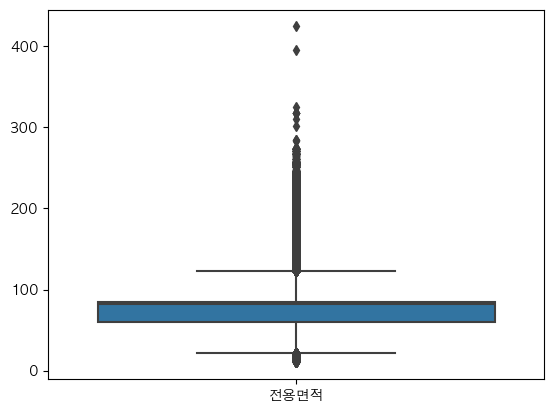

In [11]:
sns.boxplot(tmp[['전용면적']])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


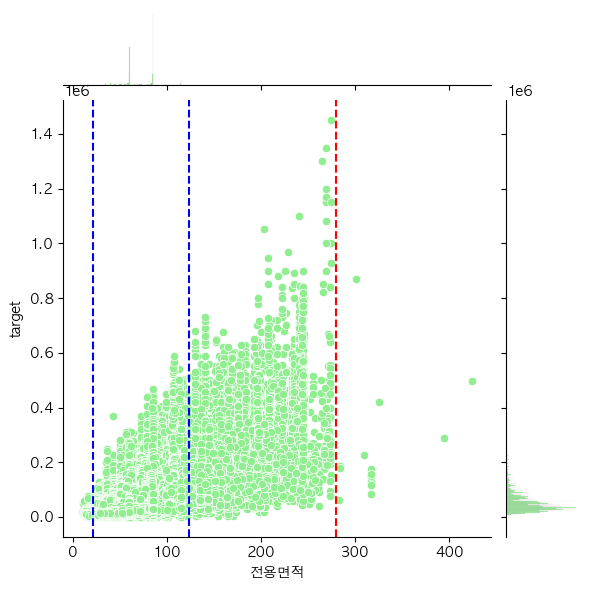

In [24]:
sns.jointplot(x='전용면적', y='target', data=tmp, color='lightgreen')

# 전용면적이 280인 지점에 빨간색 선 / IQR 방식은 파란색 선
plt.axvline(x=280, color='red', linestyle='--')
plt.axvline(x=21.68500000000001, color='blue', linestyle='--')
plt.axvline(x=122.92499999999998, color='blue', linestyle='--')
plt.show()